In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
t = np.linspace(0,3,1000) #Intervalo temporal

In [20]:
#Primero se indican el valor de los parametros del circuito dados por la Resistencia, la bobina y el 
#Capacitor, respectivamente.
R        = 100
L        = 25*10**-3
C        = 10*10**-6
paralelo = 0

In [21]:
#Seprocede a indicar el valor de las condiciones iniciales, es decir, el voltaje en el capacitor y la corritente
#que fluye a traves de la bobina en t>0. Si estos valores no estan dados en el problema, deben calcularse
#por el metodo adecuado.
Vc_ini   =3
Il_ini   =0

In [22]:
#Aqui se calculan algunas variables de interes que son comunes para circuitos en serie y paralelo y
#se especifica el tipo de cirtuito con el que se trabajara.
c        = 1/(L*C) #Coeficiente 'c' de la ec. caracteristica: ax^2 + bx + c = 0
w0       = 1/np.sqrt(L*C)

In [23]:
if paralelo:
    tipo = 'en paralelo'
    print(tipo)
    b     = 1/(R*C) #Coeficiente 'b' de la ec. caracteristica: ax^2 + bx + c = 0
    alpha = 1/(2*R*C)  
    F = (1/L)  # Factor usado para calcular la forma simbolica (sx(t)    = [[4.0cos(4.0t) + -2.0sen(4.0t)]exp(-3.0t) + 0]u(t)tr) de la integra de x(t)
else:
    tipo = 'en serie'
    print(tipo)
    b     = R/L #Coeficiente 'b' de la ec. caracteristica: ax^2 + bx + c = 0
    alpha = R/(2*L)
    F = (1/C)  # Factor usado para calcular la forma simbolica (str) de la integra de x(t)

en serie


In [24]:
c

4000000.0

In [36]:
#Ecuacion caracteristica y sus respectivas raices

s1, s2 = np.roots([1, b, c])
if np.round(s1.imag, 3):
    print('Raices complejas y conjugadas')
else:
    s1, s2 = s1.real, s2.real
    s1, s2 = np.round(s1, 3), np.round(s2, 3)
print(s1, s2)

-2000.0 -2000.0


In [26]:
# wd       = np.sqrt(s1.imag**2 - s1.real**2)
# print(alpha, w0, wd)
#round(s1.imag) == round(wd)

In [27]:
# Para el caso de que el cirtuito este sometido a una funcion forzante diferente de cero se especificaran los 
# siguientes valores asociados a esta funcion
# 1) la forma de la funcion forzante (en gral, una funcion del tiempo). Si no existe su valor sera cero.
# 1.1) Las siguientes constantes controlan la forma de la funcion forzante. Para que no aparezco uno o varios
#terminos 
alpha_p, w0_p = alpha, w0

a1       = 0
a2       = 0
a3       = 0
a4       = 0
a5       = 0

first_term = f'{a1}sin({w0_p}t) +'
second_term= f'{a2}cos({w0_p}t) +'
third_term = f'{a3}'
fourth_term= f'{a5}t +'
fith_term  = f'{a5}'
sixth_term = f'exp(-{alpha_p}t) +'

if a1 == 0:
    first_term = ''
if a2 == 0:
    second_term = ''
if a3 == 0:
    third_term = ''
if a4 == 0:
    fourth_term = ''
if a5 == 0:
    fith_term = ''
    
compact_term = f'({first_term}{second_term}{third_term}){sixth_term}'
if first_term == second_term == third_term == '':
    compact_term = ''
    
    
xf    = (a1*np.sin(w0*t) + a2*np.cos(w0_p*t) + a3)*np.exp(-alpha_p*t) + (a4)*t + a5
xf_str= f'{compact_term}{fourth_term}{fith_term}'
if a1 == a2 == a3 == a4 == a5 == 0:
    xf_str = '0'
    
#2) la funcion forzante evaluada en t = 0
xf_en_0       = a2 + a3 + a5
#3) la derivada de la funcion forzante con respecto al tiempo
xf_prima      =((a1*w0_p - a2*alpha_p)*np.cos(w0_p*t) -(a1*alpha_p + a2*w0_p)*np.sin(w0_p*t))*np.exp(-alpha_p*t) + a3
#4) la derivada de la funcion forzante evaluada en t = 0
xf_prima_en_0 = a1*w0_p - a2*alpha_p + a3
print(f'xf = {xf_str}')

xf = 0


In [37]:
if s1 != s2 and not np.iscomplex(s1):
    caso = 'Caso 1: Sobre amortiguado'
    print(caso)
    coeff_A = [[1, 1], [s1, s2]]
elif np.iscomplex(s1):
    caso = 'Caso 2: Sub-amortiguado'
    print(caso)
    coeff_A = [[1, 0], [s1.real, s1.imag]]
else:
    caso = 'Caso 3: Criticamente amortiguado'
    print(caso)
    coeff_A = [[1, 0], [s1.real, 1]]
coeff_A

Caso 3: Criticamente amortiguado


[[1, 0], [-2000.0, 1]]

In [29]:
#Si el circuito es paralelo con fuente externa y se requiere el voltaje o si es serie con fuente externa 
# y se requiere la corrinte usar este bloque:



# if paralelo:
#     Vc_prima_ini = -Vc_ini/(R*C) - Il_ini/C #Aplicando LCK en el circuito paralelo
#     coeff_B      =  [Vc_ini - xf_en_0, Vc_prima_ini - xf_prima_en_0]
# else:
#     Il_prima_ini = -(R*Il_ini)/L - Vc_ini/L + xf_en_0  #Aplicando LCK en el circuito paralelo
#     coeff_B      =  [Il_ini - xf_en_0, Il_prima_ini - xf_prima_en_0]
# coeff_B

In [38]:
# Si el circuito es paralelo con fuente externa y se requiere la corriente en la bobina,
# o si es serie con fuente externa y se requiere el voltaje en el capacitor, usar este bloque:


if paralelo:
    Il_prima_ini =  Vc_ini/L
    coeff_B      =  [Il_ini - xf_en_0, Il_prima_ini - xf_prima_en_0]
else:
    Vc_prima_ini =  Il_ini/C
    coeff_B      =  [Vc_ini - xf_en_0, Vc_prima_ini - xf_prima_en_0]
coeff_B

[3, 0.0]

In [39]:
print(f'{coeff_A[0][0]}A + {coeff_A[0][1]}B = {coeff_B[0]}')
print(f'{coeff_A[1][0]}A + {coeff_A[1][1]}B = {coeff_B[1]}')

1A + 0B = 3
-2000.0A + 1B = 0.0


In [40]:
X = np.linalg.solve(coeff_A, coeff_B)
A, B = X

In [41]:
s1, s2 = np.round(s1, 3), np.round(s2, 3)
A, B = np.round(A, 3), np.round(B, 3)
print(A, B)
s1

3.0 6000.0


-2000.0

In [42]:
if caso == 'Caso 1: Sobre amortiguado':
    x_de_t      = xf_en_0 + A*np.exp(s1*t) + B*np.exp(s2*t) #Considerando xf como una constante en todos los casos
    solucion    = f'x(t)  = [{A}exp({s1}t) + {B}exp({s2}t) + {xf_str}]u(t)'
#     x_de_t_en_0 = xf + A + B
    x_prima_de_t= (A*s1 + B*s1)*np.exp(s1*t)
#     x_prima_de_t_en_0 = A*s1 + B*s2
    x_integral  = (A/s1 + B/s2)*np.exp(s1*t)
    sol_integr  = f'Sx(t) = [{(F)*(A/s1)}*exp({s1}t) + {(F)*(B/s2)}*exp({s2}t)]u(t)'
    
elif caso == 'Caso 2: Sub-amortiguado':
    x_de_t      = xf_en_0 + (A*np.cos(s1.imag*t) + B*np.sin(s1.imag*t))*np.exp(s1.real*t)
    solucion    = f'x(t)    = [[{A}cos({s1.imag}t) + {B}sen({s1.imag}t)]exp({s1.real}t) + {xf_str}]u(t)'
#     x_de_t_en_0 = xf + A
    x_prima_de_t= xf_prima + ((A*s1.real + B*s1.imag)*np.cos(s1.imag*t) + (B*s1.real - A*s1.imag)*np.sin(s1.imag*t))*np.exp(s1.real*t)
#     x_prima_de_t_en_0 = xf + A*s1.real + B*s1.imag
    x_integral  = (np.exp(s1.real*t)*(np.sin(s1.imag*t)*(s1.real*B + s1.imag*A) + np.cos(s1.imag*t)*(s1.real*A - s1.imag*B)))/(s1.real**2 + s1.imag**2)
    sol_integr  = f'''F*Sx(t) = [(({F*(s1.real*B + s1.imag*A)/(s1.real**2 + s1.imag**2)})sin({s1.imag}t) + ({F*(s1.real*A - s1.imag*B)/(s1.real**2 + s1.imag**2)})cos({s1.imag}t))exp({s1.real}t)]'''
else:
    caso == 'Caso 3: Criticamente Amortiguado'
    x_de_t      = xf_en_0 + (A + B*t)*np.exp(s1*t)
    solucion    = f'x(t) = [({A} + {B}t)exp({s1}t) + {xf_str}]u(t)'
#     x_de_t_en_0 = xf + A
    x_prima_de_t= (A*s1 + B*(1 + t*s1))*np.exp(s1*t)
#     x_prima_de_t_en_0 = A*s1 + B
    x_integral = (np.exp(s1*t)*(A*s1 + B*(s1*t - 1)))/s1**2
print(solucion)
if (xf == 0*t).all():
    print(sol_integr)  

x(t) = [(3.0 + 6000.0t)exp(-2000.0t) + 0]u(t)
Sx(t) = [-7033072752.45*exp(-2000.0t) + 7033072602.45*exp(-2000.0t)]u(t)


In [18]:
print(x_de_t[0], s1)

3.0 -2000.0


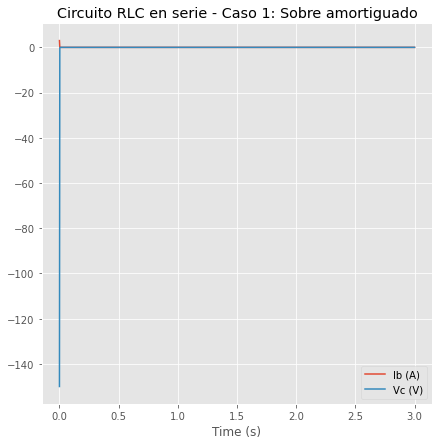

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(7, 7))
if paralelo:
    plt.plot(t,x_de_t,label='Vc (V)')
    Il =  x_integral/L
    plt.plot(t,Il,label='Ib (A)')
else:
    plt.plot(t,x_de_t,label='Ib (A)')
    Vc = -R*x_de_t - L*x_prima_de_t
    plt.plot(t,Vc,label='Vc (V)')
plt.xlabel('Time (s)')
plt.title(f'Circuito RLC {tipo} - {caso}')
plt.legend()
plt.show()